In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import sqlite3
import statsmodels.api as sm

### READING DATASETS

##### 1.1 Data\tn.movie_budgets.csv

In [2]:
# Reading movie_budgets dataset
df_movie_budgets = pd.read_csv("../data/tn.movie_budgets.csv",encoding='latin1')

df_movie_budgets.shape # checking shape
"""Has 5782 rows and 6 columns"""

df_movie_budgets.info()
df_movie_budgets.head() # displaying sample data (first 5 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### 1.2 Data\tmdb.movies.csv

In [3]:
# Reading tmdb_movies dataset
df_movies = pd.read_csv("../data/tmdb.movies.csv",encoding='latin1')
df_movies.shape # checking shape
"""Has 26517 rows and 10 columns"""

df_movies.info()
df_movies.head().T # displaying sample data (first 5 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
genre_ids,"[12, 14, 10751]","[14, 12, 16, 10751]","[12, 28, 878]","[16, 35, 10751]","[28, 878, 12]"
id,12444,10191,10138,862,27205
original_language,en,en,en,en,en
original_title,Harry Potter and the Deathly Hallows: Part 1,How to Train Your Dragon,Iron Man 2,Toy Story,Inception
popularity,33.533,28.734,28.515,28.005,27.92
release_date,2010-11-19,2010-03-26,2010-05-07,1995-11-22,2010-07-16
title,Harry Potter and the Deathly Hallows: Part 1,How to Train Your Dragon,Iron Man 2,Toy Story,Inception
vote_average,7.7,7.7,6.8,7.9,8.3
vote_count,10788,7610,12368,10174,22186


### CLEANING DATASETS

In [4]:
# Function to remove special columns from movies and movies_budgets
def special_characters( df,columns):
    # for each colums specified the below is perfomed
    for col in columns:
        # Check if the column is of type object (string) before cleaning
        if df[col].dtype == 'object':
           df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
           # Assertion to ensure the column has been converted to float
        assert df[col].dtype == 'float64', f"Column {col} was not converted to float"
    return df

#specifying dataframes
df1 = df_movies
df2 = df_movie_budgets

# specifying columns from the budgets and gross dataframes
columns_to_clean_df2 = ['production_budget','domestic_gross','worldwide_gross']

# cleaning specificified columns
df2 = special_characters(df2, columns_to_clean_df2)

# output sample
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [5]:
# Creating a new columns in df_movies_budget 
#year in the df_movies_budget by extracting years from release_date
df2['year'] = pd.to_datetime(df2['release_date']).dt.year.astype(int)
#year in the df_movies by extracting years from release_date
df1['year'] = pd.to_datetime(df1['release_date']).dt.year.astype(int)

# Checking column creation of year and datatype
assert 'year' in df2.columns, "The 'year' column was not created."
assert df2['year'].dtype == 'int32', "The 'year' column is not type integer."
assert 'year' in df1.columns, "The 'year' column was not created."
assert df1['year'].dtype == 'int32', "The 'year' column is not type integer."

# Feature engineering a foreign_gross column
# foreign_gross = worldwide_gross - domestic_gross 
df2['foreign_gross'] = df2['worldwide_gross'] - df2 ['domestic_gross']
# assertion
assert 'foreign_gross' in df2.columns,"The 'foreign_gross column was not created"

In [6]:
# renaming the movie column to title
df2 = df2.rename(columns = {'movie':'title'},errors='ignore')

# Function to change all titles to title case and removing any leading whitespaces
def clean_df(df):
    # Title case for all columns containing 'title' in the column name
    for col in df.columns:
        if 'title' in col.lower():
            df[col] = df[col].str.title()  # Converts to title case
        
        # Remove leading and trailing whitespace from all columns
        df[col] = df[col].str.strip() if df[col].dtype == "object" else df[col]
    
    return df

# ouput:
df1 = clean_df(df1)
df2 = clean_df(df2)

In [7]:
# Movies dataset cleaning
# Convert both columns to title case
df1['original_title'] = df1['original_title'].str.title()
# Identify rows where titles are not identical after standardization
mismatched_titles = df1[df1['original_title'] != df1['title']]

# View mismatched titles if any
mismatched_titles.count()
"""A total of 2532 mismatched titles"""

'A total of 2532 mismatched titles'

In [8]:
import ast

genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western",
    # TV Show-specific genres
    10759: "Action & Adventure",
    10762: "Kids",
    10763: "News",
    10764: "Reality",
    10765: "Sci-Fi & Fantasy",
    10766: "Soap",
    10767: "Talk",
    10768: "War & Politics"
}

# Function to convert a list of genre IDs to genre names
def ids_to_names(genre_ids_str):
    # Convert the string representation of a list to an actual list of integers
    genre_ids = ast.literal_eval(genre_ids_str)
    # Map each genre ID to its name using the genre_map dictionary
    return [genre_map[genre_id] for genre_id in genre_ids if genre_id in genre_map]

# Apply the function to the 'genre_ids' column
df1['genre_names'] = df1['genre_ids'].apply(ids_to_names)


df1.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter And The Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter And The Deathly Hallows: Part 1,7.7,10788,2010,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How To Train Your Dragon,28.734,2010-03-26,How To Train Your Dragon,7.7,7610,2010,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,"[Adventure, Action, Science Fiction]"


In [9]:
# Lets drop columns not to be used for analysis in budget tables
columns_to_drop = ['id','release_date']
df2 = df2.drop(columns = columns_to_drop,errors = 'ignore')
# dropping columns in movies datasets
cols_to_drop = ['Unnamed: 0','original_language','original_title','release_date']
df1 = df1.drop(columns = cols_to_drop,errors='ignore')


In [10]:
# Merging dataframes to use for Analysis
clean_movie_df = df2.merge(df1, on='title', how = 'inner') # performed an inner join
clean_movie_df.shape

(2446, 13)

In [11]:
# checking any null values
clean_movie_df.isna().sum()
# dropping null values
clean_movie_df = clean_movie_df.dropna()
clean_movie_df.head()

,title,production_budget,domestic_gross,worldwide_gross,year_x,foreign_gross,genre_ids,id,popularity,vote_average,vote_count,year_y,genre_names
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09,"[28, 12, 14, 878]",19995,26.526,7.4,18676,2009,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates Of The Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08,"[12, 28, 14]",1865,30.579,6.4,8571,2011,"[Adventure, Action, Fantasy]"
2,Avengers: Age Of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08,"[28, 12, 878]",99861,44.383,7.3,13457,2015,"[Action, Adventure, Science Fiction]"
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.369319e+09,"[12, 28, 14]",299536,80.773,8.3,13948,2018,"[Adventure, Action, Fantasy]"
4,Justice League,300000000.0,229024295.0,6.559452e+08,2017,4.269209e+08,"[28, 12, 14, 878]",141052,34.953,6.2,7510,2017,"[Action, Adventure, Fantasy, Science Fiction]"


In [12]:
#dropping unwanted columns
col_to_drop = ['year_y','genre_ids','id' ]
clean_movie_df = clean_movie_df.drop(columns = col_to_drop,axis=1)
# Renaming columns
clean_movie_df = clean_movie_df.rename(columns = {'year_x':'year'})
# creating new_column
# profit = worldwide_gross-production_budget
clean_movie_df['profit'] = clean_movie_df['worldwide_gross']- clean_movie_df['production_budget']

In [14]:
clean_movie_df.head()

,title,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,popularity,vote_average,vote_count,genre_names,profit,ROI
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.015838e+09,26.526,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]",2.351345e+09,5.532577
1,Pirates Of The Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,8.046000e+08,30.579,6.4,8571,"[Adventure, Action, Fantasy]",6.350639e+08,1.546673
2,Avengers: Age Of Ultron,330600000.0,459005868.0,1.403014e+09,2015,9.440081e+08,44.383,7.3,13457,"[Action, Adventure, Science Fiction]",1.072414e+09,3.243841
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.369319e+09,80.773,8.3,13948,"[Adventure, Action, Fantasy]",1.748134e+09,5.827114
4,Justice League,300000000.0,229024295.0,6.559452e+08,2017,4.269209e+08,34.953,6.2,7510,"[Action, Adventure, Fantasy, Science Fiction]",3.559452e+08,1.186484


### EDA Analysis

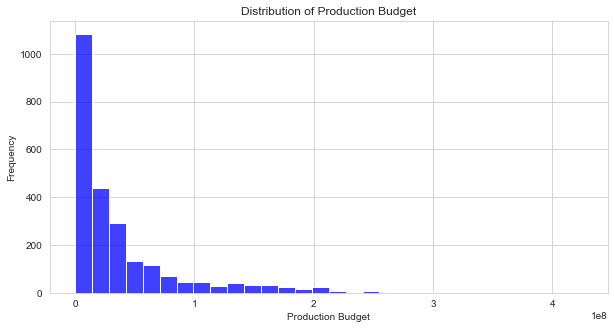

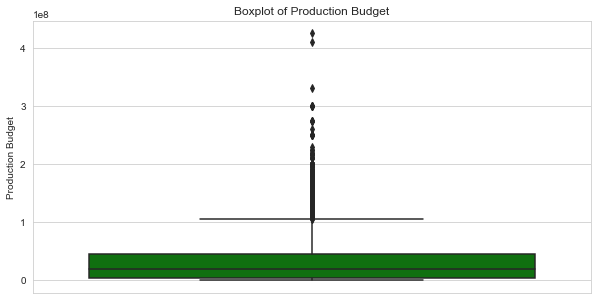

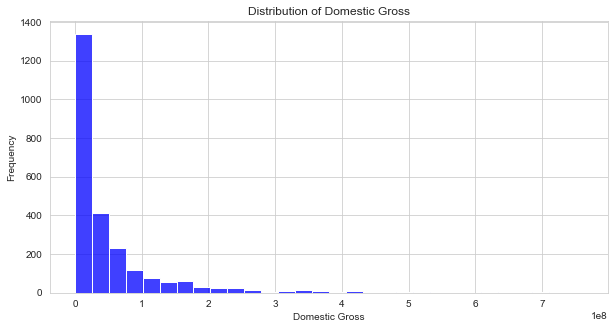

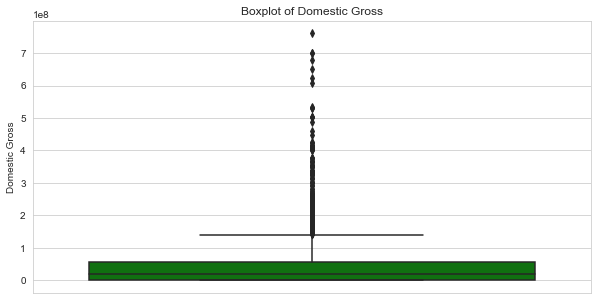

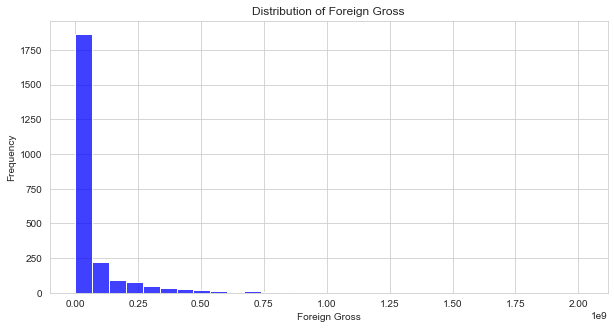

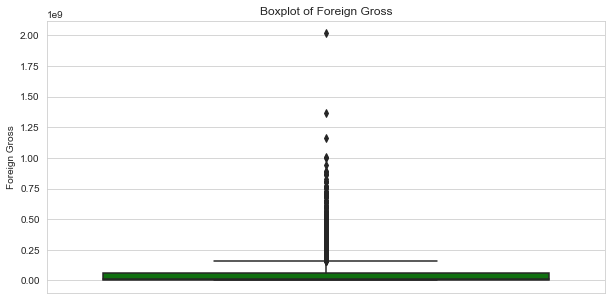

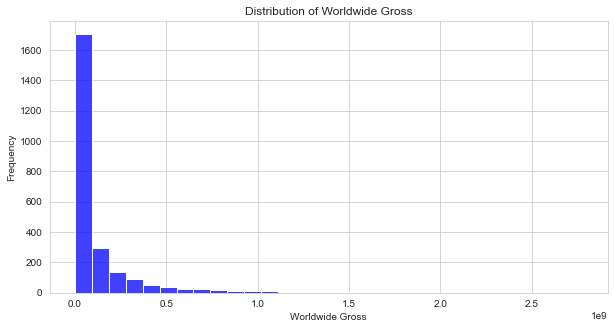

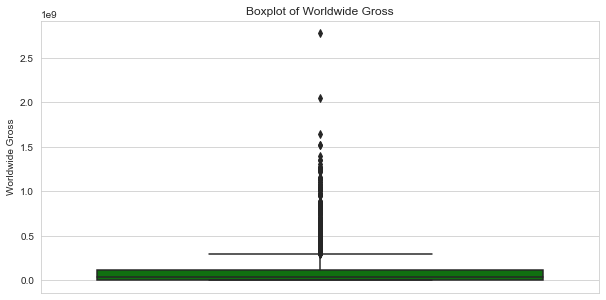

In [15]:
# Function to plot distribution and boxplot for any given column in the dataset
def plot_column_distribution(df, column_name, bin_size=30, figsize=(10, 5)):
    # Creating a copy of dataframe is copied and we add version for readability
    df = df.copy()
    df.loc[:,f'{column_name}'] = df[column_name]
    
    # Plotting the histogram
    plt.figure(figsize=figsize)
    sns.histplot(df[f'{column_name}'], bins=bin_size, kde=False, color='blue')
    plt.title(f'Distribution of {column_name.replace("_", " ").title()}')
    plt.xlabel(f'{column_name.replace("_", " ").title()}')
    plt.ylabel('Frequency')
    plt.show()

    # Plotting the boxplot for outliers
    plt.figure(figsize=figsize)
    sns.boxplot(y=df[f'{column_name}'], color='green')
    plt.title(f'Boxplot of {column_name.replace("_", " ").title()}')
    plt.ylabel(f'{column_name.replace("_", " ").title()}')
    plt.show()

# usage of the function with final_df for multiple columns:
columns_to_plot = ['production_budget', 'domestic_gross','foreign_gross' ,'worldwide_gross']
# Loop through the columns and plot each one
for column in columns_to_plot:
    #plot_column_distribution(final_df, column, bin_size=30, figsize=(10, 5))
    plot_column_distribution(clean_movie_df,column, bin_size=30,figsize=(10,5))

Observations
- Production budget, and all the earnings distribution are left skewed.
- Production budget in particular shows that most budgets are less than $100,000,000
- There are cases of outliers observed, however they are important. In cases of earnings the outliers might 
depict blockbusters.

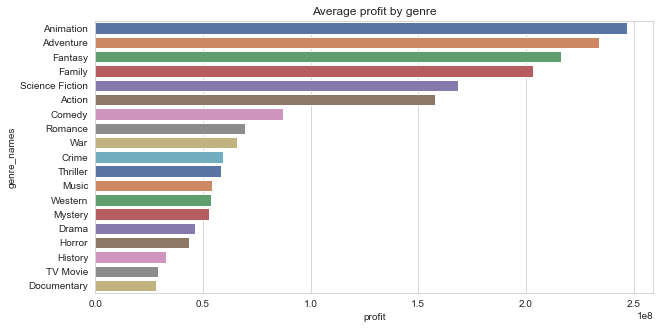

In [16]:
# Profitability by genres
explode_data = clean_movie_df.explode('genre_names')

profit_genre = explode_data.groupby(['genre_names']).agg({"profit":"mean"}).reset_index().sort_values(by='profit',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='profit', y='genre_names', data=profit_genre, palette='deep')
plt.title("Average profit by genre")
plt.show()

Insights on profitability by genre
- Top 5 most profitable genres are Animation, Adventure, Fantasy, Family, Sci_Fi.
- Genres that generate profits above $150,000,000 are Animation, Adventure, Fantasy, Family, Sci_Fi and Action

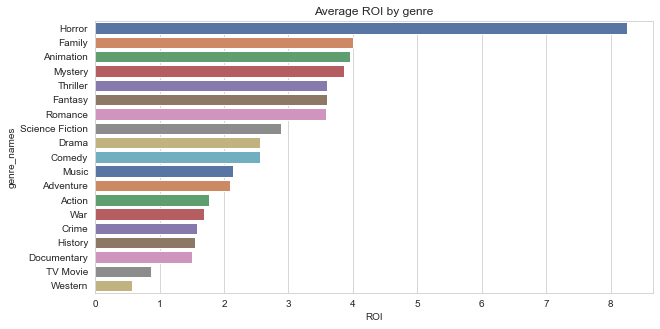

In [17]:
# Return on Investment by Genre
ROI_genre = explode_data.groupby(['genre_names']).agg({"ROI":"mean"}).reset_index().sort_values(by='ROI',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='ROI', y='genre_names', data=ROI_genre, palette='deep')
plt.title("Average ROI by genre")
plt.show()

Insights on ROI by Genre
- Horror genre has the highest ROI 
- Other top genres are Family, Animation, Mystery

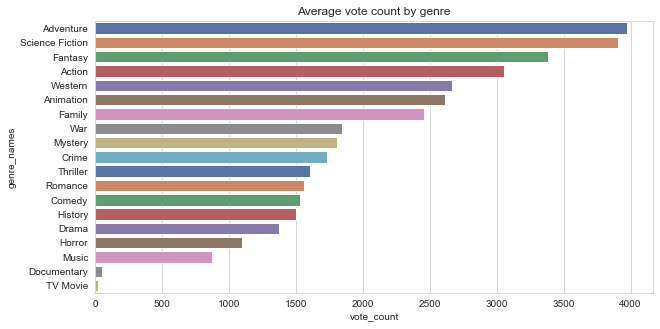

In [18]:
# Genre Analysis by Vote count (how many people voted )
avg_vote_count = explode_data.groupby(['genre_names']).agg({"vote_count":"mean"}).reset_index().sort_values(by='vote_count',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='vote_count', y='genre_names', data=avg_vote_count, palette='deep')
plt.title("Average vote count by genre")
plt.show()

Insights on Vote Count by Genre
- Genre with high votes were Adventure, Sci-Fi, Fantasy, Action.

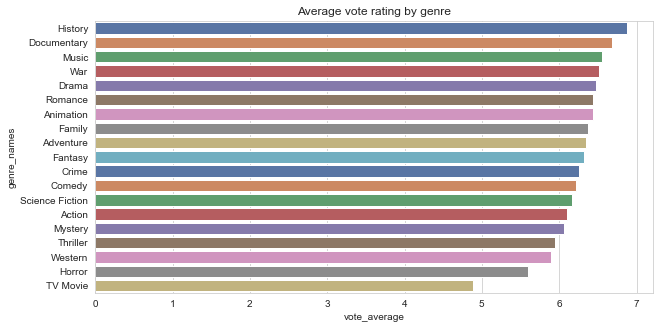

In [19]:
# Genre Analysis by Rating
avg_vote_rating = explode_data.groupby(['genre_names']).agg({"vote_average":"mean"}).reset_index().sort_values(by='vote_average',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='vote_average', y='genre_names', data=avg_vote_rating, palette='deep')
plt.title("Average vote rating by genre")
plt.show()

Insights on Rating by Genre
- Of all the Genres only TV movies had a less than 5 rating, with History having the highest rating

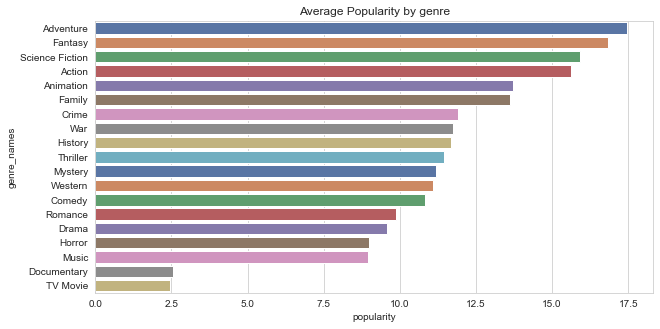

In [20]:
# Genre Analysis by popularity
avg_popularity = explode_data.groupby(['genre_names']).agg({"popularity":"mean"}).reset_index().sort_values(by='popularity',
                                                                                                      ascending=False)

#Plotting bar plot
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='popularity', y='genre_names', data=avg_popularity, palette='deep')
plt.title("Average Popularity by genre")
plt.show()

Insights on Popularity by Genre
- Adventure genre was the most popular
- Documentary and TV movie were the least popular genres

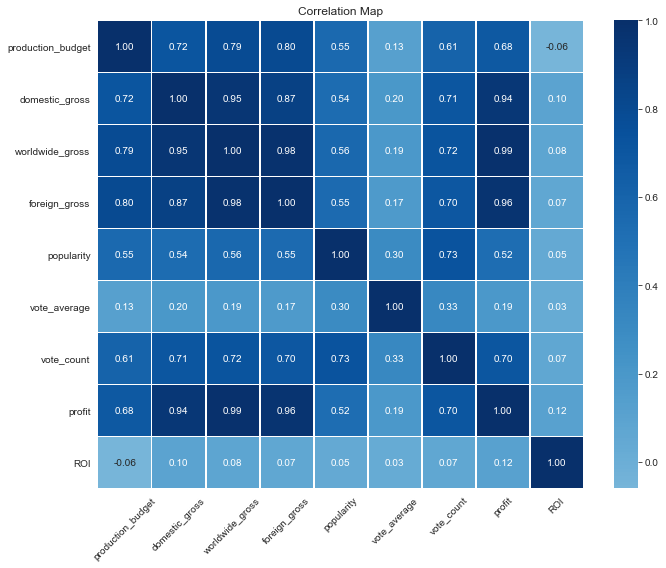

In [21]:
def plot_corr_heatmap(df, cols=None, figsize=(10, 8)):
    """
    This function takes in a DataFrame and plots a heatmap showing correlations between the columns.
    
    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns to consider for the correlation map. 
      If None, all numeric columns will be used (default is None)
    - figsize: Tuple for the figure size (default is (10, 8))
    """
    # If columns is not provided, use all numeric columns in the DataFrame
    if cols is None:
        cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Calculate the correlation matrix for the specified columns
    correlation_matrix = df[cols].corr()
    
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar=True, center=0)
    
    # Title and labels
    plt.title('Correlation Map')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.yticks(rotation=0)   # Keep y-axis labels horizontal
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
#plot_corr_heatmap(final_df)  # Plot the correlation map for all columns
plot_corr_heatmap(clean_movie_df)


In [22]:
# Function to get correlation values
def get_corr(df, threshold=0.7):
   
    # Calculating correlation matrix and stacking it to create pairs
    correlations = df.corr().stack().reset_index()
    correlations.columns = ['Variable 1', 'Variable 2', 'correlation']
    
    # Filtering out self-correlations
    correlations = correlations[correlations['Variable 1'] != correlations['Variable 2']]
    
    # Add 'correlation_strength' column based on threshold
    correlations['correlation_strength'] = correlations['correlation'].apply(
        lambda x: 'high' if abs(x) > threshold else 'low'
    )

    # Sort by correlation values and drop duplicate pairs
    correlations = correlations.sort_values(by='correlation', ascending=False).drop_duplicates(subset=['correlation'])
    
    return correlations.reset_index(drop=True)

# Usage example:
correlation_data = get_corr(clean_movie_df)
print(correlation_data)


           Variable 1         Variable 2  correlation correlation_strength
0     worldwide_gross             profit     0.985249                 high
1       foreign_gross    worldwide_gross     0.982788                 high
2              profit      foreign_gross     0.963065                 high
3      domestic_gross    worldwide_gross     0.945985                 high
4              profit     domestic_gross     0.941203                 high
5      domestic_gross      foreign_gross     0.869810                 high
6   production_budget      foreign_gross     0.798850                 high
7   production_budget    worldwide_gross     0.793946                 high
8          popularity         vote_count     0.732381                 high
9          vote_count    worldwide_gross     0.723513                 high
10  production_budget     domestic_gross     0.718474                 high
11     domestic_gross         vote_count     0.705918                 high
12         vote_count    

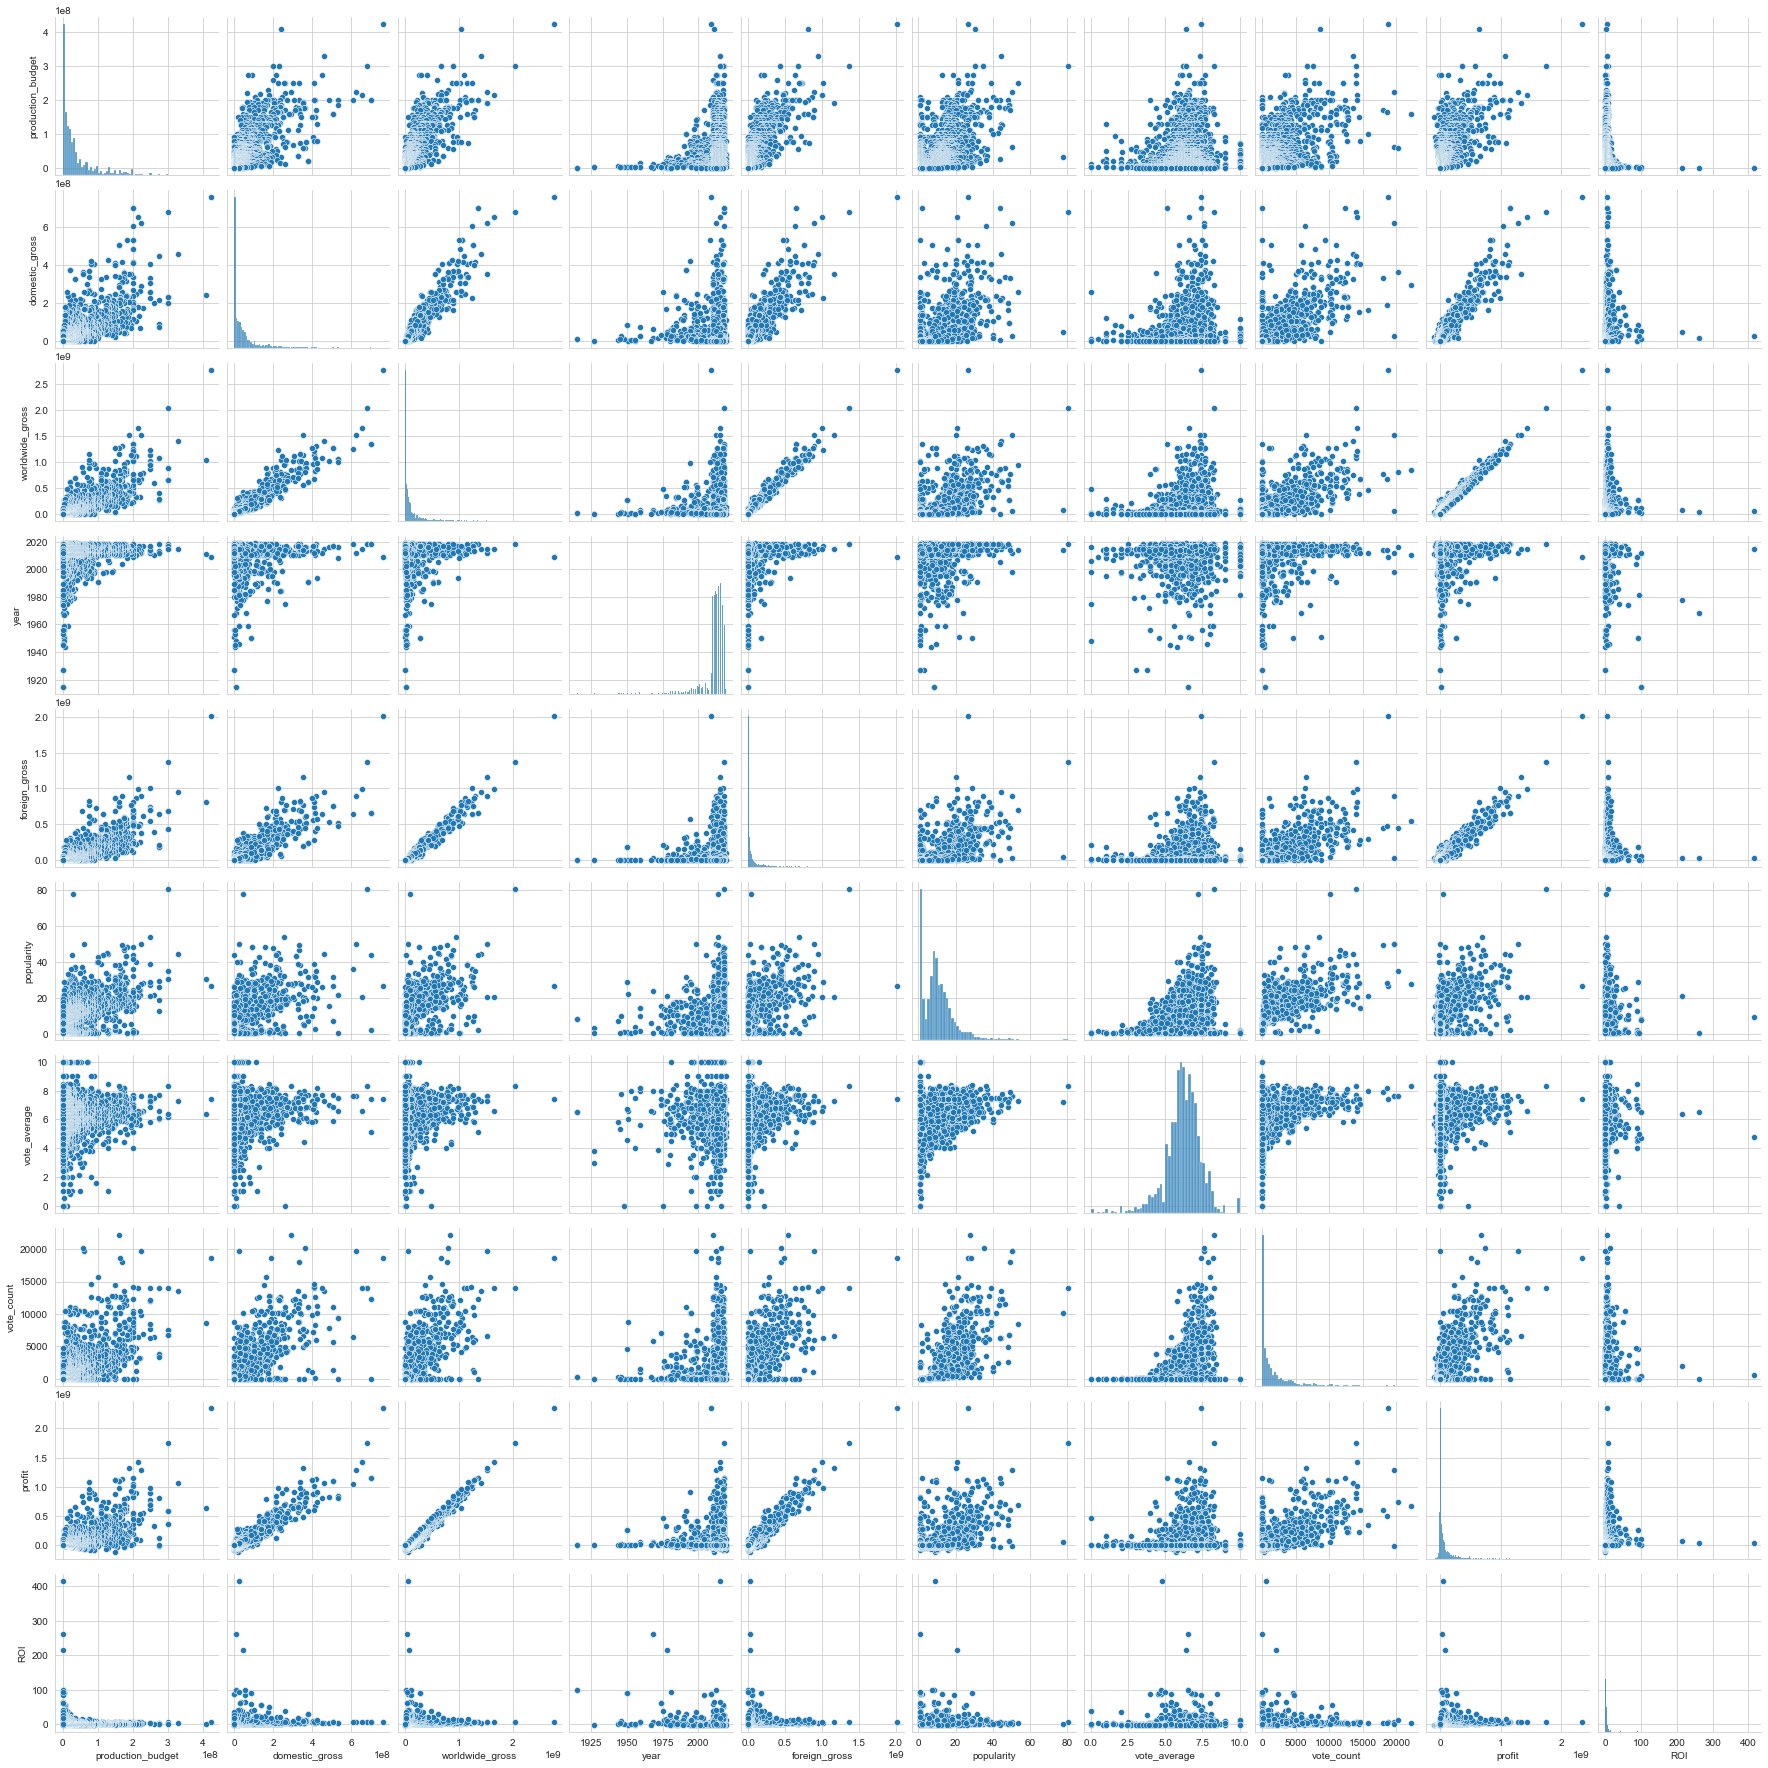

In [23]:
# pairplot for linearity comparisons
sns.pairplot(clean_movie_df)
plt.show()

Predictive Modelling

In [24]:
# Modelling
X = clean_movie_df[['production_budget']]
y = clean_movie_df['worldwide_gross']

model = sm.OLS(endog=y, exog=sm.add_constant(X))

results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     4168.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:21:21   Log-Likelihood:                -49233.
No. Observations:                2446   AIC:                         9.847e+04
Df Residuals:                    2444   BIC:                         9.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -9.28e+06   3.35e+06     -2.771      0.006   -1.58e+07   -2.71e+06
production_budget     3.4095      0.053     64.558      0.000       3.306       3.513
==============================================================================
Omnibus:                     1402.780   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27164.448
Skew:                           2.309   Prob(JB):                         0.00
Kurtosis:                      18.659   Cond. No.                     7.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

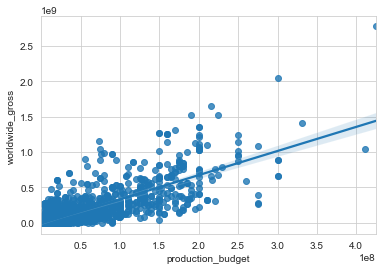

In [26]:
sns.regplot(x="production_budget", y="worldwide_gross", data=clean_movie_df);

In [27]:
# # Assuming a production budget of 250,000,000 what will be worldwide gross return
# # Define the new production budget for prediction
# new_production_budget = 250000000
# X_new = sm.add_constant([[new_production_budget]])
# # Use the model to predict the worldwide gross for the given production budget
# predicted_worldwide_gross = results.predict(X_new)

# # Output the predicted value
# print(f"Predicted Worldwide Gross: ${predicted_worldwide_gross[0]:,.2f}")



Model insights
- model explains about 63% of variance in worldwide-gross
- p-value is 0.0 which is less than alpha = 0.05, model is stastistically significant

#### Recommendations
Profitability by Genres 
- Based on profitability, the company should consider investing in these genres
  Animation, Adventure, Fantasy, Family, Sci_Fi or Action as they generate profits above $150 million

ROI by Genre
- Horror has the best ROI, however the company should consider Family or Animation, as they are among top performing genres in terms of profit and ROI. For Horror, the votecounts are low which suggests it might niched, meaning producing 
the horror will be for a specific demographic.

In [28]:
# creating csv for tableau
clean_movie_df .to_csv('../data/movies_cleaned.csv')

explode_data.to_csv('../data/explode_data.csv')